# Insurance Fraud Claims Detection¶

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,mean_squared_error,r2_score
from sklearn.metrics import roc_curve

### Importing Dataset

In [2]:
data = pd.read_csv('insurance_claims.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.shape

(1000, 40)

In [5]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
pd.DataFrame(data['auto_make'].value_counts())

,auto_make
Saab,80
Dodge,80
Suburu,80
Nissan,78
Chevrolet,76
Ford,72
BMW,72
Toyota,70
Audi,69
Accura,68


In [11]:
pd.DataFrame(data['fraud_reported'].value_counts())

,fraud_reported
N,753
Y,247


In [12]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [13]:
pd.DataFrame(data['auto_model'].value_counts())

,auto_model
RAM,43
Wrangler,42
A3,37
Neon,37
MDX,36
Jetta,35
Passat,33
A5,32
Legacy,32
Pathfinder,31


### Preprocessing

In [14]:
data = data.drop(['_c39','policy_bind_date','incident_date','policy_csl','capital-loss'], axis=1)

In [15]:
cat_cols = data.select_dtypes('object')
num_cols = data.select_dtypes('number')
cat_cols.columns,num_cols.columns

(Index(['policy_state', 'insured_sex', 'insured_education_level',
        'insured_occupation', 'insured_hobbies', 'insured_relationship',
        'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city',
        'incident_location', 'property_damage', 'police_report_available',
        'auto_make', 'auto_model', 'fraud_reported'],
       dtype='object'),
 Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
        'policy_annual_premium', 'umbrella_limit', 'insured_zip',
        'capital-gains', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
        'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
        'auto_year'],
       dtype='object'))

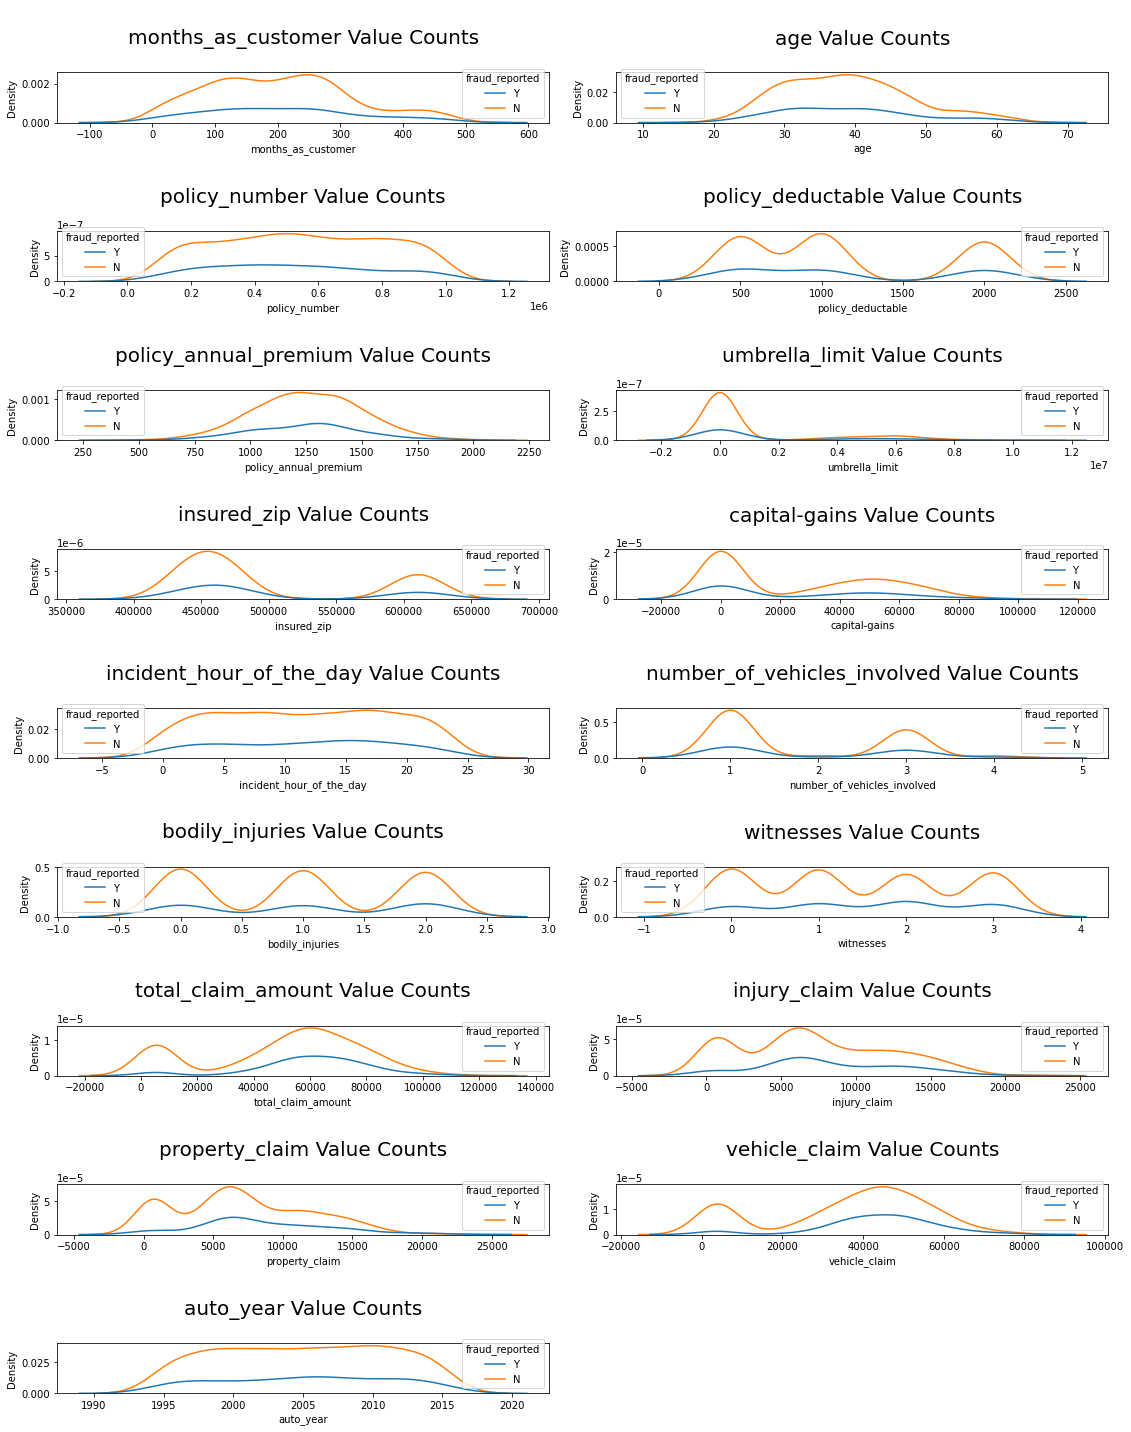

In [16]:
cols = ['months_as_customer', 'age', 'policy_number', 'policy_deductable',
        'policy_annual_premium', 'umbrella_limit', 'insured_zip',
        'capital-gains', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
        'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
        'auto_year']
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 18:
        ax = plt.subplot(9, 2, plotnumber)
        sns.kdeplot(x = cols[i], data = data, ax = ax,hue='fraud_reported')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

##### Plot Headmap :
Headmap to check Correlation ( Correlation explains how one or more variables are related to each other )

<AxesSubplot:>

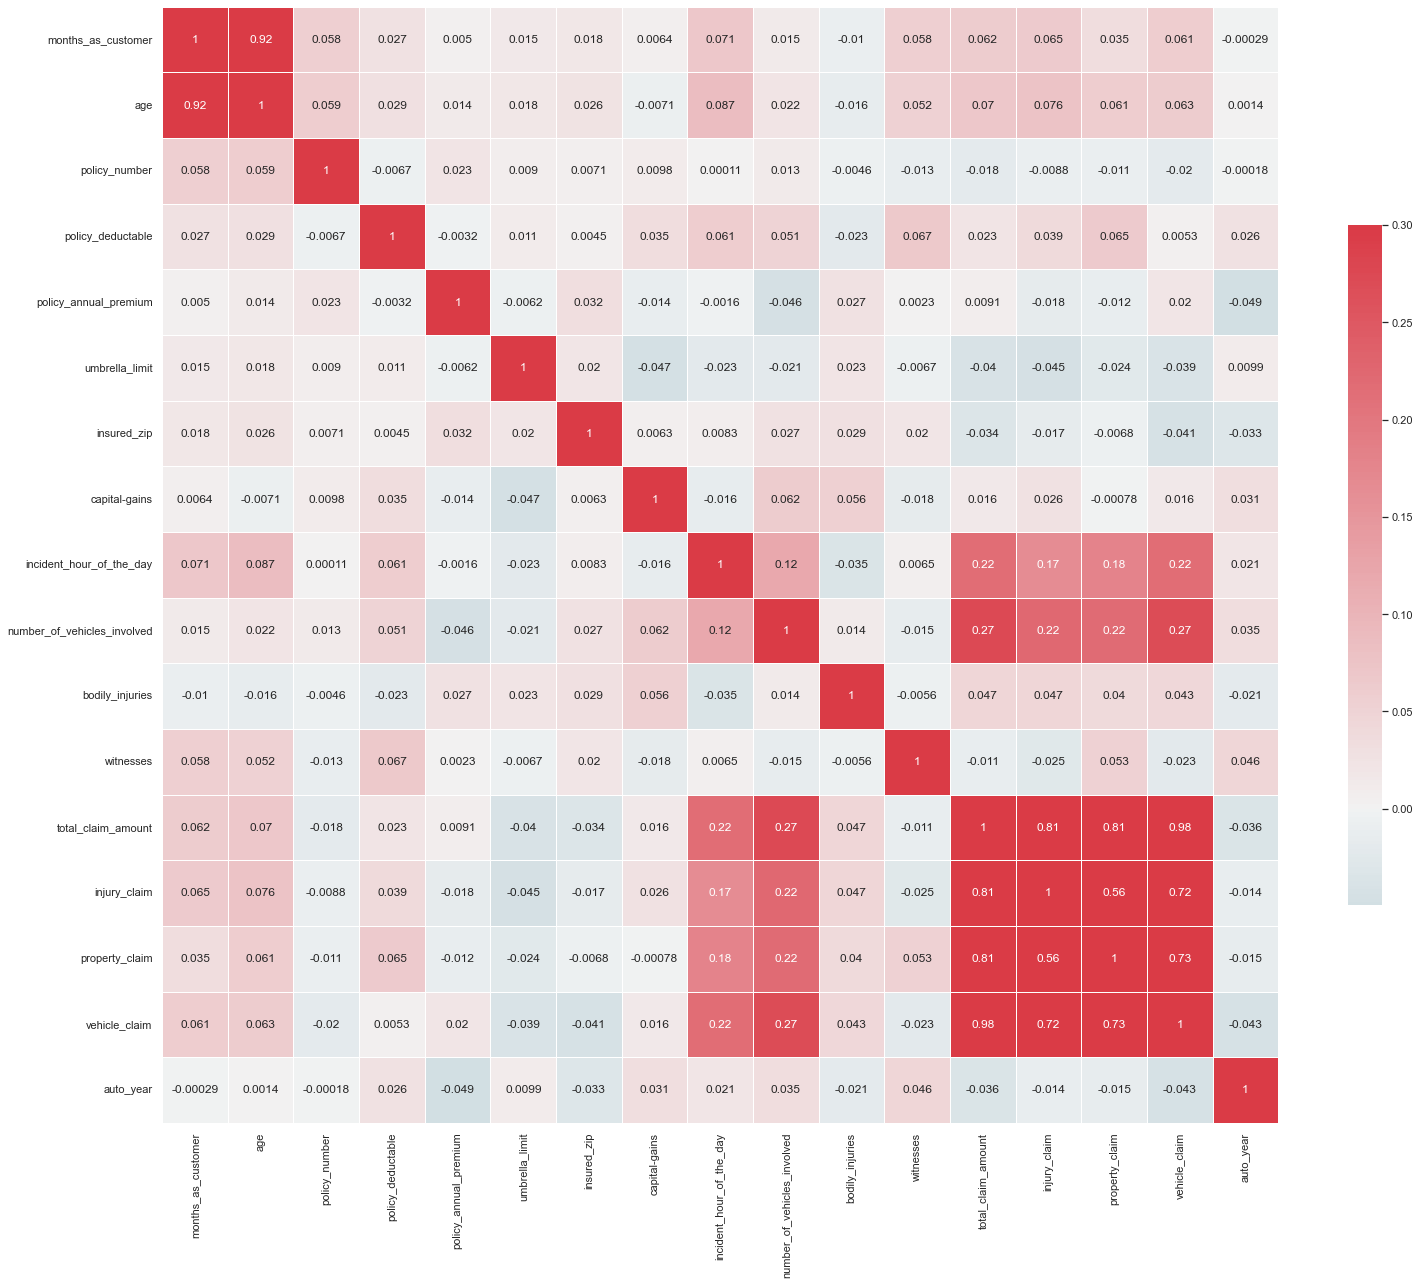

In [17]:
sns.set(style="dark")
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

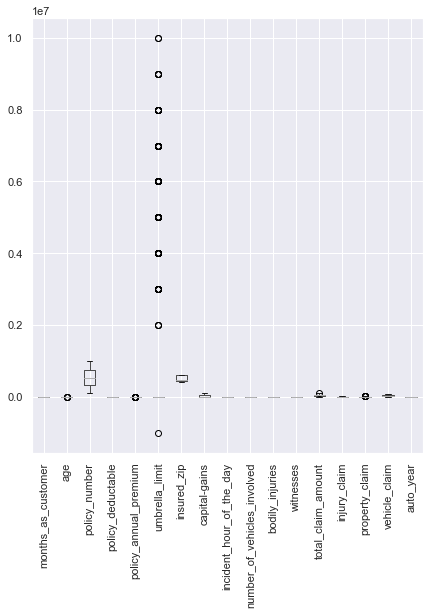

In [18]:
# outliers
plt.figure(figsize = (7,8))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [19]:
def encoder(df):
    
    for col in df.select_dtypes('object'):
        le=LabelEncoder()
        le.fit(df[col])
        df[col]=le.transform(df[col])
    
    return df

In [20]:
data = encoder(data)

### Extract X and y

In [21]:
X = data.drop(['fraud_reported'],axis=1)
y = data['fraud_reported']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### My methodology

#### LogisticRegression

In [24]:
classifier = LogisticRegression(solver='lbfgs' ,max_iter=9000)
classifier.fit(X_train,y_train)
y_pred_lr = classifier.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#### Accuracy Score

In [25]:
asLR = accuracy_score(y_test, y_pred_lr)
asLR

0.695

In [26]:
confusion_matrix(y_test,y_pred_lr)

array([[126,  19],
       [ 42,  13]], dtype=int64)

In [27]:
print(classification_report(y_test,y_pred_lr,zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       145
           1       0.41      0.24      0.30        55

    accuracy                           0.69       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.66      0.69      0.67       200



#### KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#### Accuracy Score

In [29]:
asKNN = accuracy_score(y_test, y_pred_knn)
asKNN

0.695

In [30]:
confusion_matrix(y_test,y_pred_knn)

array([[133,  12],
       [ 49,   6]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred_knn,zero_division=0))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       145
           1       0.33      0.11      0.16        55

    accuracy                           0.69       200
   macro avg       0.53      0.51      0.49       200
weighted avg       0.62      0.69      0.63       200



#### DecisionTreeClassifier

In [32]:
dt = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_leaf= 5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

#### Accuracy Score

In [33]:
asDT = accuracy_score(y_test, y_pred_dt)
asDT

0.805

In [34]:
confusion_matrix(y_test,y_pred_dt)

array([[125,  20],
       [ 19,  36]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred_dt,zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       145
           1       0.64      0.65      0.65        55

    accuracy                           0.81       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.81      0.81      0.81       200



[Text(0.5446428571428571, 0.9, 'incident_severity <= -0.749\nentropy = 0.795\nsamples = 800\nvalue = [608, 192]\nclass = No'),
 Text(0.2857142857142857, 0.7, 'policy_annual_premium <= -0.111\nentropy = 0.965\nsamples = 215\nvalue = [84, 131]\nclass = Yes'),
 Text(0.14285714285714285, 0.5, 'property_claim <= 1.494\nentropy = 1.0\nsamples = 97\nvalue = [48, 49]\nclass = Yes'),
 Text(0.07142857142857142, 0.3, 'policy_annual_premium <= -1.081\nentropy = 0.994\nsamples = 86\nvalue = [47, 39]\nclass = No'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.918\nsamples = 30\nvalue = [10, 20]\nclass = Yes'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.924\nsamples = 56\nvalue = [37, 19]\nclass = No'),
 Text(0.21428571428571427, 0.3, 'incident_location <= -0.038\nentropy = 0.439\nsamples = 11\nvalue = [1, 10]\nclass = Yes'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Yes'),
 Text(0.25, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Tex

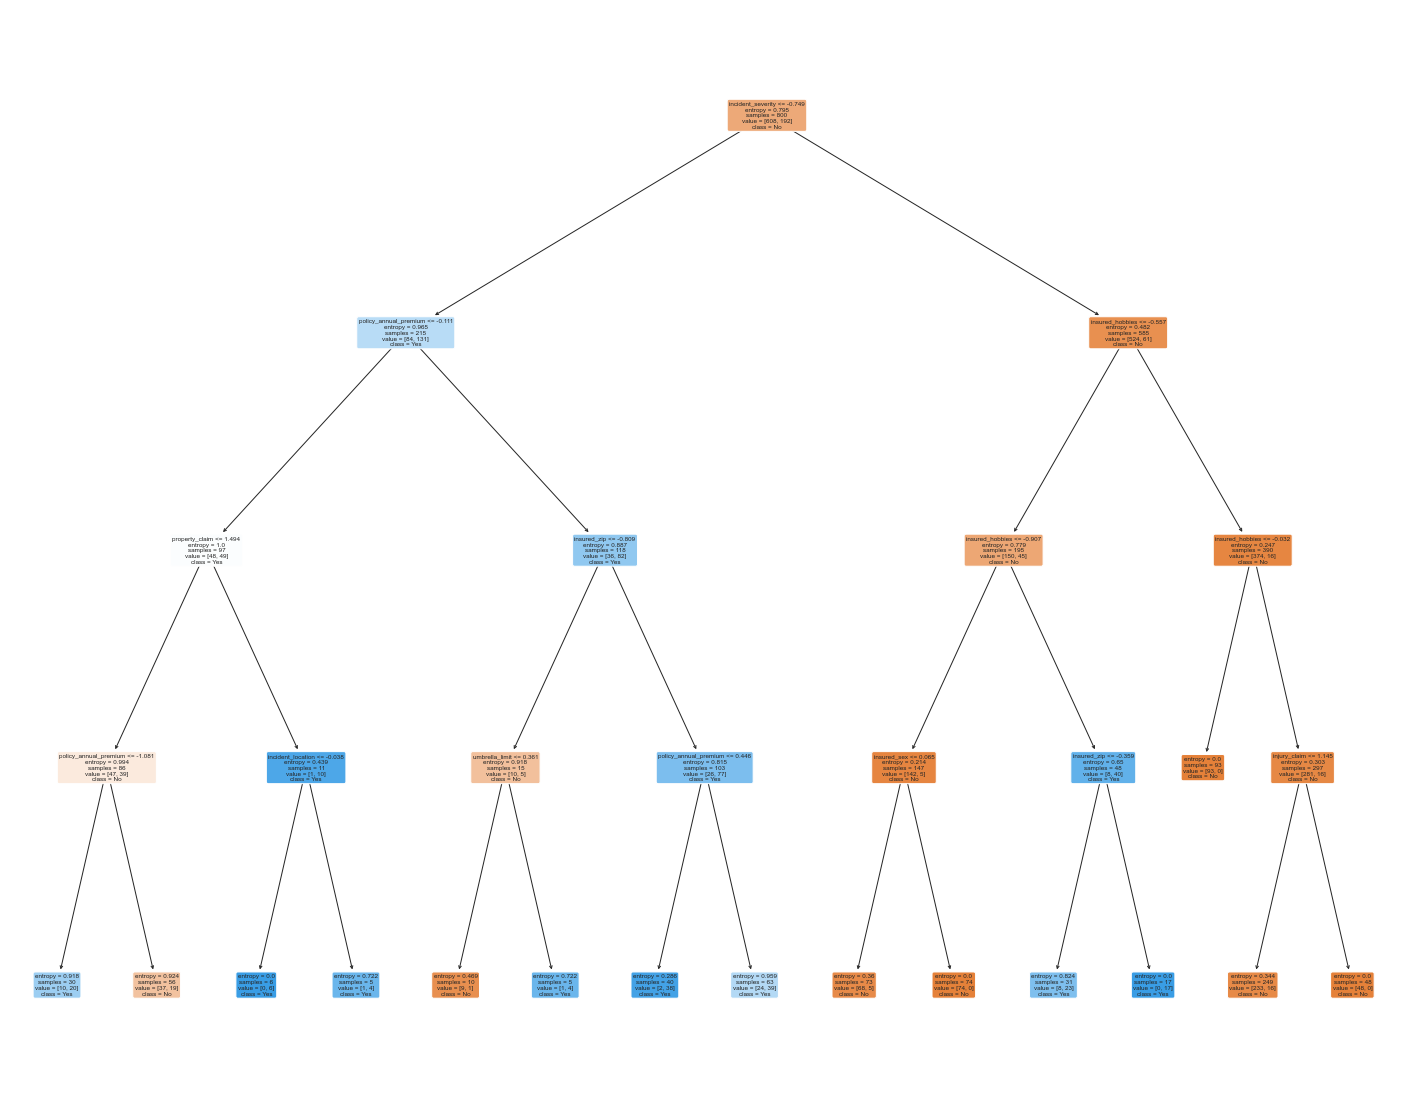

In [36]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=X.columns,class_names=['No','Yes'],filled = True, rounded = True)

In [37]:
print(classification_report(y_test,y_pred_dt,zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       145
           1       0.64      0.65      0.65        55

    accuracy                           0.81       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.81      0.81      0.81       200



In [38]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances

months_as_customer             0.000000
age                            0.000000
policy_number                  0.000000
policy_state                   0.000000
policy_deductable              0.000000
policy_annual_premium          0.071795
umbrella_limit                 0.016321
insured_zip                    0.037706
insured_sex                    0.015436
insured_education_level        0.000000
insured_occupation             0.000000
insured_hobbies                0.386486
insured_relationship           0.000000
capital-gains                  0.000000
incident_type                  0.000000
collision_type                 0.000000
incident_severity              0.436141
authorities_contacted          0.000000
incident_state                 0.000000
incident_city                  0.000000
incident_location              0.003651
incident_hour_of_the_day       0.000000
number_of_vehicles_involved    0.000000
property_damage                0.000000
bodily_injuries                0.000000


<AxesSubplot:>

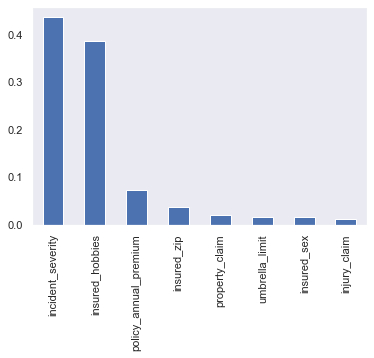

In [39]:
feat_importances.nlargest(8).plot(kind='bar')

#### Comparison 

###### MSE

In [40]:
import sklearn.metrics as metrics

In [41]:
lr_mse=metrics.mean_squared_error(y_test, y_pred_lr)
print("MSE LR: ",lr_mse)
knn_mse=metrics.mean_squared_error(y_test, y_pred_knn)
print("MSE KNN: ",knn_mse)
dt_mse=metrics.mean_squared_error(y_test, y_pred_dt)
print("MSE DT: ",dt_mse)

MSE LR:  0.305
MSE KNN:  0.305
MSE DT:  0.195


In [42]:
data_mse = {'lr_mse':[0.305],'knn_mse':[0.305],'dt_mse':[0.195]}
def best_model(data_mse):
# Calculating the lowest MSE
    mse_min = min(data_mse.values())
# Storing the lowest MSE in result
    result = [key for key in data_mse if data_mse[key] == mse_min]
    Model_name = []
    if result == ['lr_mse']:
        a = 'LinearRegression'
        Model_name.append(a)
    elif result == ['knn_mse']:
        b = 'KNeighborsRegressor'
        Model_name.append(b)
    elif result == ['dt_mse']:
        c = 'DecisionTreeClassifier'
        Model_name.append(c)
# Printing the result
    print("The best model with the lowest MSE to be selected is", Model_name)

best_model(data_mse)

The best model with the lowest MSE to be selected is ['DecisionTreeClassifier']


#### Plot 

In [43]:
classifiers = ['KNN', 'Logistic Regression', 'Decision Tree']
scores = [asKNN, asLR,asDT]

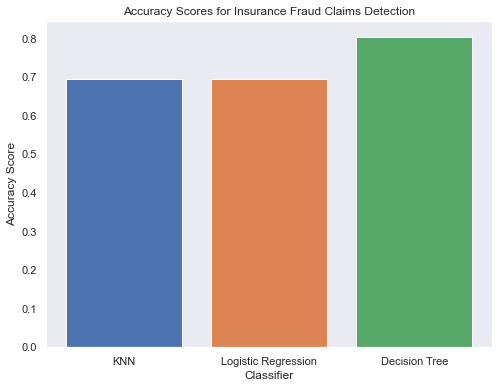

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(classifiers)):
    ax.bar(classifiers[i], scores[i])

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Scores for Insurance Fraud Claims Detection')
plt.show()

#### ROC

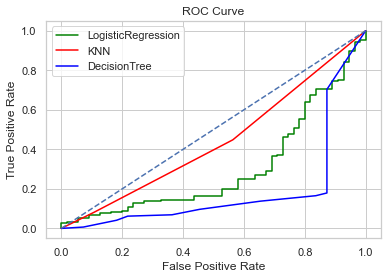

In [80]:
pred_prob  = classifier.predict_proba(X_test)
pred_prob1 = knn.predict_proba(X_test)
pred_prob2 = dt.predict_proba(X_test)
fpr,tbr,threshold    = roc_curve(y_test, pred_prob[:,1],pos_label=0)
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob1[:,1],pos_label=0)
fpr2,tbr2,threshold2 = roc_curve(y_test, pred_prob2[:,1],pos_label=0)
plt.plot(fpr, tbr, linestyle='-', color='green', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='red', label='KNN')
plt.plot(fpr2, tbr2, linestyle='-', color='blue', label='DecisionTree')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

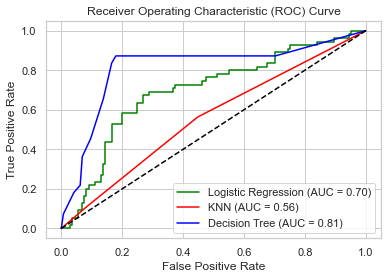

In [114]:
from sklearn.metrics import roc_curve, auc

# predict class probabilities for each classifier
pred_prob_lr = classifier.predict_proba(X_test)
pred_prob_knn = knn.predict_proba(X_test)
pred_prob_dt = dt.predict_proba(X_test)

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds for each classifier
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)

# calculate AUC (Area Under the Curve) for each classifier
auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)
auc_dt = auc(fpr_dt, tpr_dt)

# plot ROC curves for each classifier
plt.plot(fpr_lr, tpr_lr, color='green', label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_knn, tpr_knn, color='red', label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot(fpr_dt, tpr_dt, color='blue', label='Decision Tree (AUC = %0.2f)' % auc_dt)

# plot the reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# set legend
plt.legend(loc='lower right')

# show the plot
plt.show()


### Make a prediction for a new person

In [81]:
new_person = pd.DataFrame({'months_as_customer': [12], 'age': [30], 'policy_number': [1000],
                           'policy_state': ['NY'],  'policy_deductable': [500],
                           'policy_annual_premium': [1000], 'umbrella_limit': [500000], 'insured_zip': [12345], 
                           'insured_sex': ['M'], 'insured_education_level': ['Bachelor'], 'insured_occupation': ['Manager'],
                           'insured_hobbies': ['Golf'], 'insured_relationship': ['Husband'], 'capital-gains': [0],
                           'incident_type': ['Single Vehicle Collision'], 
                           'collision_type': ['Front Collision'], 'incident_severity': ['Minor Damage'], 'authorities_contacted': ['Police'],
                           'incident_state': ['NY'], 'incident_city': ['Albany'], 'incident_location': ['Address 123'], 
                           'incident_hour_of_the_day': [10],'number_of_vehicles_involved': [1], 'property_damage': ['NO'],
                           'bodily_injuries': [1], 'witnesses': [2],'police_report_available': ['YES'],
                           'total_claim_amount': [5000], 'injury_claim': [1000],'property_claim': [3000],
                           'vehicle_claim': [1000], 'auto_make': ['Toyota'], 'auto_model': ['Corolla'],'auto_year': [2021]})


In [82]:
for i in new_person:
    print(i)

months_as_customer
age
policy_number
policy_state
policy_deductable
policy_annual_premium
umbrella_limit
insured_zip
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
capital-gains
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
incident_hour_of_the_day
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_make
auto_model
auto_year


In [83]:
new_person = encoder(new_person)

In [84]:
prediction = dt.predict(new_person)
print(prediction)

[0]


C:\Users\arulk\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [85]:
if prediction == 1:
    print('Yes, you can give insurance to the person.')
else:
    print('No, you cannot give insurance to the person.')


No, you cannot give insurance to the person.


##### Best estimator

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [87]:
clf = DecisionTreeClassifier()

In [88]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

In [89]:
grid_search = GridSearchCV(clf, parameters, cv=5)

In [90]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [91]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [92]:
dt_bst = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=3, min_samples_leaf=1, min_samples_split= 3)
dt_bst.fit(X_train, y_train)
y_pred_dt_bst = dt_bst.predict(X_test)
y_pred_dt_bst

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

#### Accuracy Score

In [93]:
asDT_bst = accuracy_score(y_test, y_pred_dt_bst)
asDT_bst

0.81

In [94]:
confusion_matrix(y_test,y_pred_dt_bst)

array([[131,  14],
       [ 24,  31]], dtype=int64)

In [95]:
print(classification_report(y_test,y_pred_dt_bst,zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       145
           1       0.69      0.56      0.62        55

    accuracy                           0.81       200
   macro avg       0.77      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200



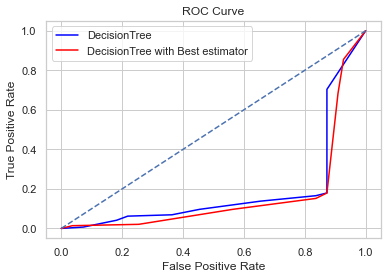

In [96]:
pred_prob_dt_bst = dt_bst.predict_proba(X_test)
pred_prob_dt = dt.predict_proba(X_test)
fprdt,tbrdt,thresholddt = roc_curve(y_test, pred_prob_dt[:,1],pos_label=0)
fpr1bst,tbrbst,thresholdbst = roc_curve(y_test, pred_prob_dt_bst[:,1],pos_label=0)

plt.plot(fprdt, tbrdt, linestyle='-', color='blue', label='DecisionTree')
plt.plot(fpr1bst, tbrbst, linestyle='-', color='red', label='DecisionTree with Best estimator')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

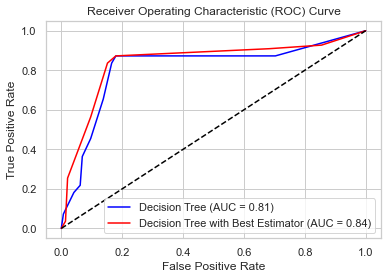

In [115]:
from sklearn.metrics import roc_curve, auc

# predict class probabilities for decision tree classifiers
pred_prob_dt = dt.predict_proba(X_test)
pred_prob_dt_bst = dt_bst.predict_proba(X_test)

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds for each classifier
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_dt_bst, tpr_dt_bst, thresholds_dt_bst = roc_curve(y_test, pred_prob_dt_bst[:,1], pos_label=1)

# calculate AUC (Area Under the Curve) for each classifier
auc_dt = auc(fpr_dt, tpr_dt)
auc_dt_bst = auc(fpr_dt_bst, tpr_dt_bst)

# plot ROC curves for each classifier
plt.plot(fpr_dt, tpr_dt, color='blue', label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_dt_bst, tpr_dt_bst, color='red', label='Decision Tree with Best Estimator (AUC = %0.2f)' % auc_dt_bst)

# plot the reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# set legend
plt.legend(loc='lower right')

# show the plot
plt.show()


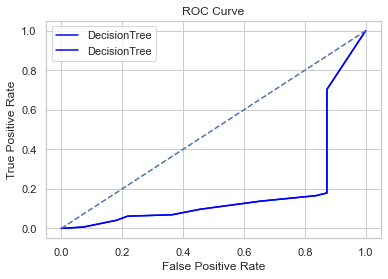

In [97]:
pred_prob_dt1 = dt.predict_proba(X_test)
fprdt1,tbrdt1,thresholddt1 = roc_curve(y_test, pred_prob_dt1[:,1],pos_label=0)
plt.plot(fprdt1, tbrdt1, linestyle='-', color='blue', label='DecisionTree')

pred_prob_dt = dt.predict_proba(X_test)
fprdt,tbrdt,thresholddt = roc_curve(y_test, pred_prob_dt[:,1],pos_label=0)
plt.plot(fprdt, tbrdt, linestyle='-', color='blue', label='DecisionTree')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

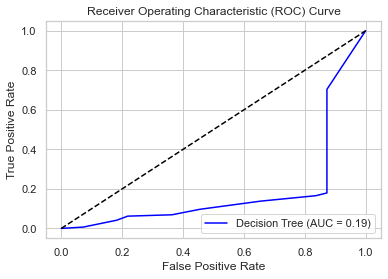

In [116]:
from sklearn.metrics import roc_curve, auc

# predict class probabilities for decision tree classifier
pred_prob_dt = dt.predict_proba(X_test)

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds for decision tree classifier
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=0)

# calculate AUC (Area Under the Curve) for decision tree classifier
auc_dt = auc(fpr_dt, tpr_dt)

# plot ROC curve for decision tree classifier
plt.plot(fpr_dt, tpr_dt, color='blue', label='Decision Tree (AUC = %0.2f)' % auc_dt)

# plot the reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# set legend
plt.legend(loc='lower right')

# show the plot
plt.show()


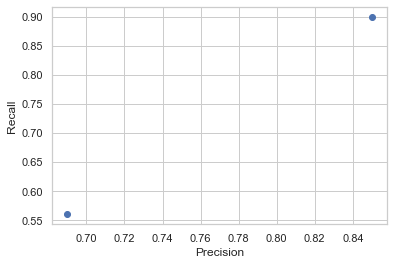

In [98]:
plt_bst_dt=classification_report(y_test,y_pred_dt_bst,zero_division=0)
precision = []
recall = []
for line in plt_bst_dt.split('\n')[2:4]:
    p, r, _, _ = map(float, line.split()[1:])
    precision.append(p)
    recall.append(r)

# Create scatter plot
plt.scatter(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

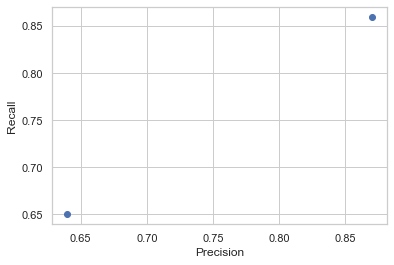

In [99]:
plt_dt=classification_report(y_test,y_pred_dt,zero_division=0)
precision = []
recall = []
for line in plt_dt.split('\n')[2:4]:
    p, r, _, _ = map(float, line.split()[1:])
    precision.append(p)
    recall.append(r)

# Create scatter plot
plt.scatter(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

##### Best Feature columns :

In [100]:
dt_bst_f = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_leaf= 5)

In [101]:
bst_x = X[['incident_severity','insured_hobbies']]

In [102]:
bst_x

,incident_severity,insured_hobbies
0,0,17
1,1,15
2,1,2
3,0,2
4,1,2
...,...,...
995,1,13
996,0,17
997,1,3
998,0,0


In [103]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(bst_x,y,test_size=0.2, random_state=42)

In [104]:
sc = StandardScaler()
X_train_b = sc.fit_transform(X_train_b)
X_test_b = sc.transform(X_test_b)

In [105]:
dt_bst_f.fit(X_train_b, y_train_b)
y_pred_dt_bst_bt = dt_bst_f.predict(X_test_b)
y_pred_dt_bst_bt

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

##### Accuracy Score

In [106]:
asDT_bst_b = accuracy_score(y_test_b, y_pred_dt_bst)
asDT_bst_b

0.81

In [107]:
confusion_matrix(y_test_b,y_pred_dt_bst)

array([[131,  14],
       [ 24,  31]], dtype=int64)

In [108]:
print(classification_report(y_test_b,y_pred_dt_bst,zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       145
           1       0.69      0.56      0.62        55

    accuracy                           0.81       200
   macro avg       0.77      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200



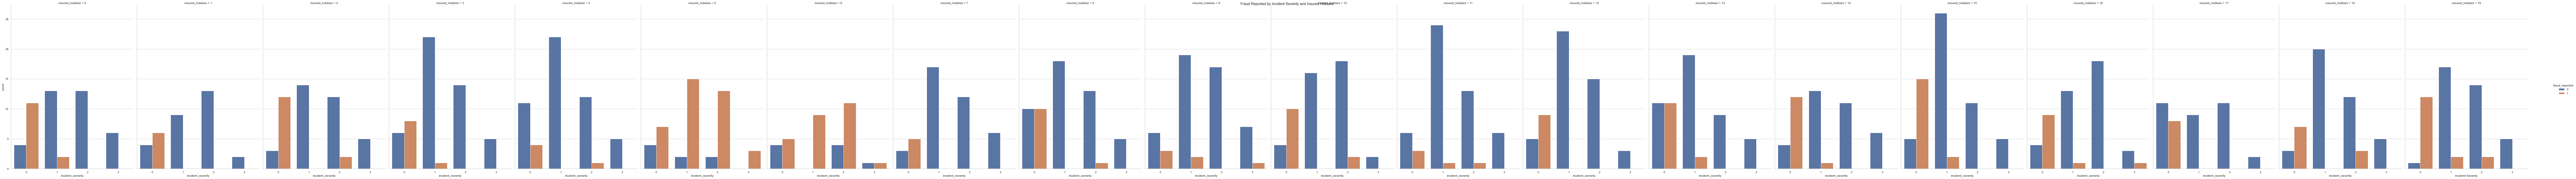

In [109]:
sns.set_style("whitegrid")

# Create the bar plot

sns.catplot(x="incident_severity", hue="fraud_reported", col="insured_hobbies",
            data=data, kind="count", height=10, aspect=.7)

# Set the labels for the plot
plt.xlabel("Incident Severity")
plt.ylabel("Count")
plt.suptitle("Fraud Reported by Incident Severity and Insured Hobbies")

# Show the plot
plt.show()

##### ROC

In [110]:
dt_bst_f = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=3, min_samples_leaf=1, min_samples_split= 3)
dt_bst_f.fit(X_train_b, y_train_b)
y_pred_dt_bst_bt = dt_bst_f.predict(X_test_b)
y_pred_dt_bst_bt

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

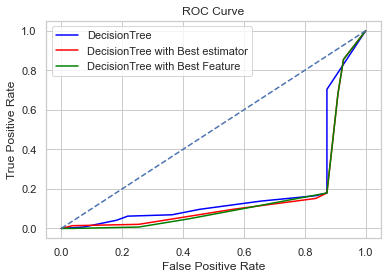

In [111]:
pred_prob_dt_bst = dt_bst.predict_proba(X_test)
pred_prob_dt = dt.predict_proba(X_test)
pred_prob_dt_bf = dt_bst_f.predict_proba(X_test_b)
fprdt,tbrdt,thresholddt = roc_curve(y_test, pred_prob_dt[:,1],pos_label=0)
fpr1bst,tbrbst,thresholdbst = roc_curve(y_test, pred_prob_dt_bst[:,1],pos_label=0)
fpr1bstf,tbrbstf,thresholdbstf = roc_curve(y_test, pred_prob_dt_bf[:,1],pos_label=0)

plt.plot(fprdt, tbrdt, linestyle='-', color='blue', label='DecisionTree')
plt.plot(fpr1bst, tbrbst, linestyle='-', color='red', label='DecisionTree with Best estimator')
plt.plot(fpr1bstf, tbrbstf, linestyle='-', color='green', label='DecisionTree with Best Feature')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

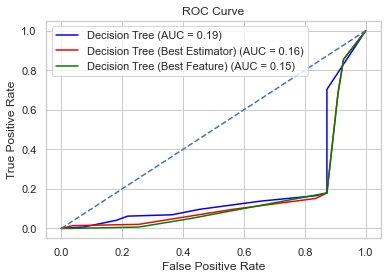

In [117]:
# Import required libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each model
pred_prob_dt = dt.predict_proba(X_test)
pred_prob_dt_bst = dt_bst.predict_proba(X_test)
pred_prob_dt_bf = dt_bst_f.predict_proba(X_test_b)

# Get fpr, tpr, and threshold values for each model
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=0)
fpr_dt_bst, tpr_dt_bst, threshold_dt_bst = roc_curve(y_test, pred_prob_dt_bst[:,1], pos_label=0)
fpr_dt_bf, tpr_dt_bf, threshold_dt_bf = roc_curve(y_test_b, pred_prob_dt_bf[:,1], pos_label=0)

# Compute AUC for each model
auc_dt = auc(fpr_dt, tpr_dt)
auc_dt_bst = auc(fpr_dt_bst, tpr_dt_bst)
auc_dt_bf = auc(fpr_dt_bf, tpr_dt_bf)

# Plot ROC curves and show AUC values in legend
plt.plot(fpr_dt, tpr_dt, linestyle='-', color='blue', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_dt_bst, tpr_dt_bst, linestyle='-', color='red', label=f'Decision Tree (Best Estimator) (AUC = {auc_dt_bst:.2f})')
plt.plot(fpr_dt_bf, tpr_dt_bf, linestyle='-', color='green', label=f'Decision Tree (Best Feature) (AUC = {auc_dt_bf:.2f})')

# Add diagonal reference line and axis labels
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add legend and show plot
plt.legend(loc='best')
plt.show()


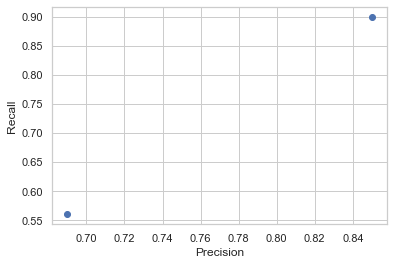

In [112]:
plt_dt_f=classification_report(y_test_b,y_pred_dt_bst,zero_division=0)
precision = []
recall = []
for line in plt_dt_f.split('\n')[2:4]:
    p, r, _, _ = map(float, line.split()[1:])
    precision.append(p)
    recall.append(r)

# Create scatter plot
plt.scatter(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

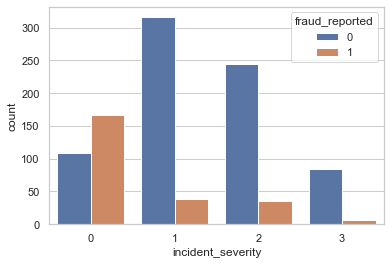

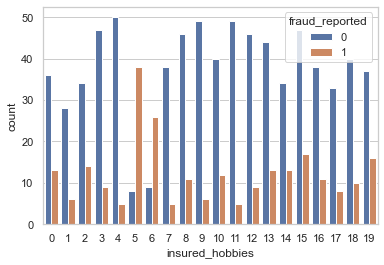

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='incident_severity', hue='fraud_reported', data=data)
plt.show()

sns.countplot(x='insured_hobbies', hue='fraud_reported', data=data)
plt.show()